In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from graphviz import Digraph

In [2]:
opt = Options()
opt.headless = True
b = webdriver.Chrome(options=opt)

In [3]:
from IPython.core.display import display, Image

In [4]:
b.set_window_size(300, 200)

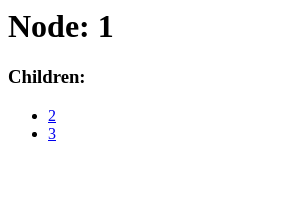

In [5]:
def show_screen():
    b.save_screenshot("screen.png")
    img = Image("screen.png")
    display(img)
    
b.get("https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice1/1.html")
show_screen()

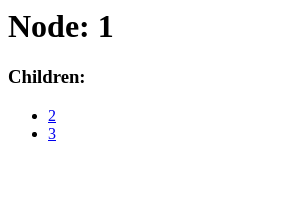

['https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice1/2.html',
 'https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice1/3.html']

In [6]:
def visit_node(url):
    b.get(url)
    show_screen()
    
    links = b.find_elements_by_tag_name("a")
    return [a.get_attribute("href") for a in links]

visit_node("https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice1/1.html")
        

In [7]:
def node_name(url):
    return url.split("/")[-1].split(".")[0]

node_name("https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/practice2/8.html")


'8'

In [8]:
from urllib.robotparser import RobotFileParser
robo = RobotFileParser("https://tyler.caraza-harter.com/robots.txt")
robo.read()
robo.can_fetch("320-agent", "https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/months/JAN-2020.html")

False

In [9]:
todo = ["https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/A.html"]
added = {todo[0]}

gv = Digraph(engine="neato")

def visit_next():
    # 1: visit first node in todo
    url = todo.pop(0)
    if not robo.can_fetch("320-agent", url):
        return
    
    child_urls = visit_node(url)
    
    # draw the graph of what we've discovered so far
    gv.node(node_name(url))
    
    # 2: add nodes discovered
    for child_url in child_urls:
        gv.edge(node_name(url), node_name(child_url))
        if not child_url in added:
            todo.append(child_url)
            added.add(child_url)
        
    display(gv)
        
    print(todo)

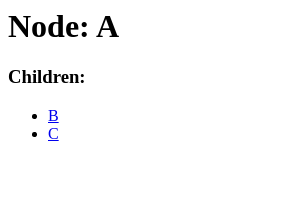

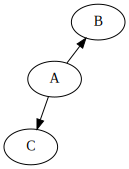

['https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/B.html', 'https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/C.html']


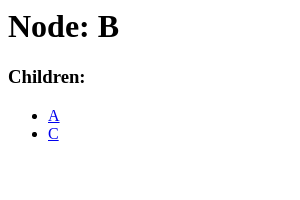

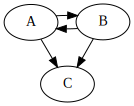

['https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/C.html']


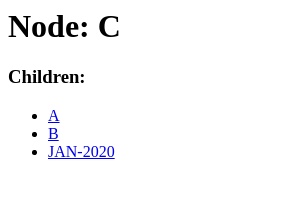

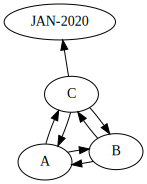

['https://tyler.caraza-harter.com/cs320/s20/lectures/lec-20/calendar/months/JAN-2020.html']


In [10]:
while len(todo) > 0:
    visit_next()

In [11]:
b.close()